## Human Activity Recognition
### By: Shashank Gurnalkar

## Loading Data

Detaset and its information: https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

Reference Video of how data was collected: https://www.youtube.com/watch?v=XOEN9W05_4A

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
cd drive/MyDrive/HAR

/content/drive/MyDrive/HAR


### Importing Libraries

In [12]:
# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# To understand the flow.
from tensorflow.keras.utils import plot_model

print(tf.__version__)

2.6.0


### Defining functions to load the data in required format

In [4]:
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [5]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).values
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [6]:

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]


    return pd.get_dummies(y).values
    #return y

In [7]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [14]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32
n_classes = 6

In [9]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [10]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

In [11]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])


print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


## Training Models with LSTM

### One LSTM layer

In [56]:
n_hidden = 32
n_classes = 6

In [ ]:
# Initiliazing the sequential model
model = keras.Sequential()
# Configuring the parameters
model.add(layers.LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(layers.Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(layers.Dense(n_classes, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                5376      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


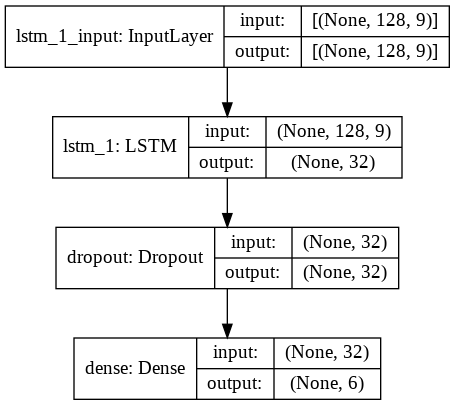

In [ ]:
# To understand the flow.
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.png', show_shapes=True)

In [ ]:
# Compiling the model
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Epoch 1/30
460/460 [==============================] - 42s 25ms/step - loss: 1.3987 - accuracy: 0.3998 - val_loss: 1.2543 - val_accuracy: 0.4466
Epoch 2/30
460/460 [==============================] - 11s 24ms/step - loss: 1.0733 - accuracy: 0.5387 - val_loss: 0.8469 - val_accuracy: 0.6417
Epoch 3/30
460/460 [==============================] - 11s 24ms/step - loss: 0.7630 - accuracy: 0.6650 - val_loss: 0.7256 - val_accuracy: 0.7204
Epoch 4/30
460/460 [==============================] - 11s 24ms/step - loss: 0.7180 - accuracy: 0.7179 - val_loss: 0.7285 - val_accuracy: 0.7448
Epoch 5/30
460/460 [==============================] - 11s 23ms/step - loss: 0.6417 - accuracy: 0.7530 - val_loss: 0.6459 - val_accuracy: 0.7740
Epoch 6/30
460/460 [==============================] - 11s 23ms/step - loss: 0.6184 - accuracy: 0.7895 - val_loss: 0.8866 - val_accuracy: 0.6871
Epoch 7/30
460/460 [==============================] - 11s 23ms/step - loss: 0.6160 - accuracy: 0.7954 - val_loss: 0.5327 - val_accuracy:

#### Val Accuracy = 0.89

### Two LSTM layers

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 128, 48)           11136     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128, 48)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 48)                18624     
_________________________________________________________________
dropout_9 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 294       
Total params: 30,054
Trainable params: 30,054
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


460/460 [==============================] - 10s 15ms/step - loss: 0.9761 - accuracy: 0.5906 - val_loss: 0.6795 - val_accuracy: 0.7340
Epoch 2/20
460/460 [==============================] - 6s 14ms/step - loss: 0.6624 - accuracy: 0.7353 - val_loss: 0.5932 - val_accuracy: 0.7781
Epoch 3/20
460/460 [==============================] - 6s 14ms/step - loss: 0.4098 - accuracy: 0.8579 - val_loss: 0.4343 - val_accuracy: 0.8517
Epoch 4/20
460/460 [==============================] - 6s 13ms/step - loss: 0.3312 - accuracy: 0.9007 - val_loss: 0.5051 - val_accuracy: 0.8297
Epoch 5/20
460/460 [==============================] - 6s 14ms/step - loss: 0.2393 - accuracy: 0.9230 - val_loss: 0.6336 - val_accuracy: 0.8113
Epoch 6/20
460/460 [==============================] - 6s 14ms/step - loss: 0.2193 - accuracy: 0.9294 - val_loss: 0.3757 - val_accuracy: 0.8551
Epoch 7/20
460/460 [==============================] - 6s 13ms/step - loss: 0.2982 - accuracy: 0.9127 - val_loss: 0.5094 - val_accuracy: 0.7710
Epoch 8/2

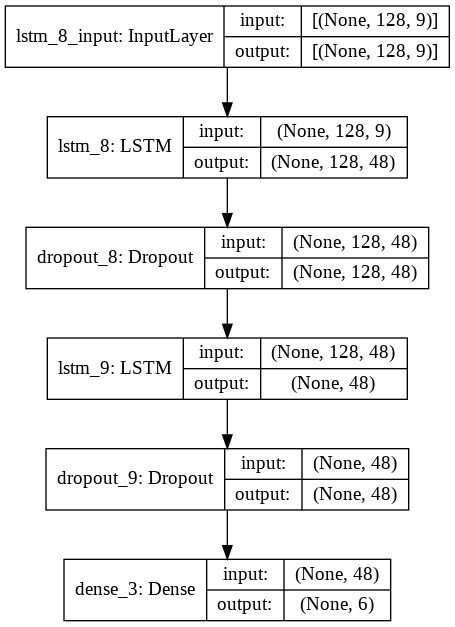

In [18]:
tf.random.set_seed(107)
epochs=20
n_hidden = 48
# Initiliazing the sequential model
model = keras.Sequential()
# Configuring the parameters
model.add(layers.LSTM(n_hidden, input_shape=(timesteps, input_dim), return_sequences=True))
# Adding a dropout layer
model.add(layers.Dropout(0.6))
# Configuring the parameters
model.add(layers.LSTM(n_hidden))
# Adding a dropout layer
model.add(layers.Dropout(0.6))
# Adding a dense output layer with sigmoid activation
model.add(layers.Dense(n_classes, activation='softmax'))
print (model.summary())

# Compiling the model
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

#model Architecture
print("*"*50)
print("Model Architecture")
plot_model(model, 'model_two_lstm.png', show_shapes=True)

#### Validation Accuracy = 0.91

## Training Models with Divide and conquer Approach

In [19]:
#To sharpen the features.
from scipy import ndimage

In [20]:

def load_y_first(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    # for two divide and conquer CNN
    for i in range(len(y)):
      if y[i] <4:
        y[i] = 0
      else:
        y[i] = 1    


    return pd.get_dummies(y).values
    #return y

In [21]:
def load_y_second(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    y_st = y[y>3]
    y_dy = y[y<4]
   


    return pd.get_dummies(y_st).values, pd.get_dummies(y_dy).values, y.values
    #return y

In [22]:
def load_data_first():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y_first('train'), load_y_first('test')

    return X_train, X_test, y_train, y_test

In [23]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data_first()

In [24]:
X_train[0].shape

(128, 9)

In [ ]:
#First stage model (To predict if the datapoint is static or dynamic)

tf.random.set_seed(140)
n_hidden1 = 64
n_hidden2 = 32
epochs = 30
n_classes = 2
# Initiliazing the sequential model
model = keras.Sequential()
# Configuring the parameters
model.add(layers.Conv1D(n_hidden2, kernel_size= 3, activation='relu', input_shape=(timesteps, input_dim), kernel_initializer='glorot_normal', kernel_regularizer='l2'))

# Configuring the parameters
model.add(layers.Conv1D(n_hidden2, kernel_size= 3, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer='l2'))

# Adding a dropout layer
model.add(layers.Dropout(0.5))

#MaxPool
model.add(layers.MaxPool1D(2))

#flatten
model.add(layers.Flatten())

# Adding a dense output layer with relu activation
model.add(layers.Dense(n_hidden1, activation='relu', kernel_initializer='he_normal'))

# Adding a dropout layer
model.add(layers.Dropout(0.5))

# Adding a dense output layer with softmax activation
model.add(layers.Dense(n_classes, activation='softmax'))

print (model.summary())

opt =  tf.keras.optimizers.Adam(learning_rate=0.0001)

# Compiling the model
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 126, 32)           896       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 124, 32)           3104      
_________________________________________________________________
dropout (Dropout)            (None, 124, 32)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 62, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1984)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                127040    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


460/460 [==============================] - 19s 7ms/step - loss: 0.2582 - accuracy: 0.9845 - val_loss: 0.1285 - val_accuracy: 0.9946
Epoch 2/30
460/460 [==============================] - 3s 6ms/step - loss: 0.0824 - accuracy: 0.9980 - val_loss: 0.0824 - val_accuracy: 0.9912
Epoch 3/30
460/460 [==============================] - 3s 6ms/step - loss: 0.0483 - accuracy: 0.9977 - val_loss: 0.0549 - val_accuracy: 0.9946
Epoch 4/30
460/460 [==============================] - 3s 6ms/step - loss: 0.0356 - accuracy: 0.9978 - val_loss: 0.0448 - val_accuracy: 0.9956
Epoch 5/30
460/460 [==============================] - 3s 6ms/step - loss: 0.0258 - accuracy: 0.9986 - val_loss: 0.0482 - val_accuracy: 0.9881
Epoch 6/30
460/460 [==============================] - 3s 6ms/step - loss: 0.0198 - accuracy: 0.9986 - val_loss: 0.0541 - val_accuracy: 0.9902
Epoch 7/30
460/460 [==============================] - 3s 6ms/step - loss: 0.0183 - accuracy: 0.9990 - val_loss: 0.0360 - val_accuracy: 0.9915
Epoch 8/30
460/4

In [ ]:
#save the model
model.save("binary.h5")

In [ ]:
def load_data_second():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')

    y_train_st, y_train_dy, y = load_y_second('train')

    y_test_st, y_test_dy, y_ = load_y_second('test')

    X_train_st = X_train[y > 3]
    X_train_dy = X_train[y < 4]

    X_test_st = X_test[y_ > 3]
    X_test_dy = X_test[y_ < 4]    

    return X_train_st, X_train_dy, X_test_st, X_test_dy, y_train_st, y_train_dy, y_test_st, y_test_dy

In [ ]:
# Loading the train and test data (for Static and dynamic model)
X_train_st, X_train_dy, X_test_st, X_test_dy, Y_train_st, Y_train_dy, Y_test_st, Y_test_dy = load_data_second()

In [ ]:
timesteps = len(X_train_st[0])
input_dim = len(X_train_st[0][0])


print(timesteps)
print(input_dim)
print(len(X_train_st))

128
9
4067


In [ ]:
#model for static classes

tf.random.set_seed(142)
n_hidden1 = 100
n_hidden2 = 50
n_hidden3 = 30
epochs = 30
n_classes = 3

# Initiliazing the sequential model_st
model_st = keras.Sequential()
# Configuring the parameters
model_st.add(layers.Conv1D(n_hidden3, kernel_size= 2, activation='relu', input_shape=(timesteps, input_dim), kernel_initializer='glorot_normal', kernel_regularizer='l2'))

# Adding a dropout layer
model_st.add(layers.Dropout(0.5))


# Configuring the parameters
model_st.add(layers.Conv1D(n_hidden2, kernel_size= 3, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer='l2'))

# Adding a dropout layer
model_st.add(layers.Dropout(0.5))


# Configuring the parameters
model_st.add(layers.Conv1D(n_hidden1, kernel_size= 4, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer='l2'))

# Add BN layer
model_st.add(layers.BatchNormalization())

# Adding a dropout layer
model_st.add(layers.Dropout(0.5))

#MaxPool
#model_st.add(layers.MaxPool1D(2))

#flatten
model_st.add(layers.Flatten())

# Adding a dense output layer with relu activation
model_st.add(layers.Dense(n_hidden1, activation='relu', kernel_initializer='glorot_normal'))

# Adding a dropout layer
model_st.add(layers.Dropout(0.5))



# Adding a dense output layer with softmax activation
model_st.add(layers.Dense(n_classes, activation='softmax'))

print (model_st.summary())

opt =  tf.keras.optimizers.Adam(learning_rate=0.0009)

# Compiling the model_st
model_st.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer='adamax',
              metrics=['accuracy'])

# Training the model_st
model_st.fit(X_train_st,
          Y_train_st,
          batch_size=batch_size,
          validation_data=(X_test_st, Y_test_st),
          epochs=epochs)


Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_94 (Conv1D)           (None, 127, 30)           570       
_________________________________________________________________
dropout_115 (Dropout)        (None, 127, 30)           0         
_________________________________________________________________
conv1d_95 (Conv1D)           (None, 125, 50)           4550      
_________________________________________________________________
dropout_116 (Dropout)        (None, 125, 50)           0         
_________________________________________________________________
conv1d_96 (Conv1D)           (None, 122, 100)          20100     
_________________________________________________________________
batch_normalization_21 (Batc (None, 122, 100)          400       
_________________________________________________________________
dropout_117 (Dropout)        (None, 122, 100)        

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4870: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


255/255 [==============================] - 2s 6ms/step - loss: 1.7422 - accuracy: 0.8094 - val_loss: 1.5868 - val_accuracy: 0.6744
Epoch 2/30
255/255 [==============================] - 1s 5ms/step - loss: 1.3807 - accuracy: 0.8739 - val_loss: 1.4570 - val_accuracy: 0.7090
Epoch 3/30
255/255 [==============================] - 1s 5ms/step - loss: 1.2563 - accuracy: 0.8881 - val_loss: 1.3921 - val_accuracy: 0.7429
Epoch 4/30
255/255 [==============================] - 1s 5ms/step - loss: 1.1903 - accuracy: 0.8844 - val_loss: 1.3072 - val_accuracy: 0.8365
Epoch 5/30
255/255 [==============================] - 1s 5ms/step - loss: 1.1111 - accuracy: 0.8948 - val_loss: 1.2500 - val_accuracy: 0.8006
Epoch 6/30
255/255 [==============================] - 1s 5ms/step - loss: 1.0343 - accuracy: 0.9012 - val_loss: 1.1372 - val_accuracy: 0.8603
Epoch 7/30
255/255 [==============================] - 1s 5ms/step - loss: 0.9774 - accuracy: 0.9041 - val_loss: 1.1013 - val_accuracy: 0.8141
Epoch 8/30
255/25

In [ ]:
#save the model
model_st.save('static.h5')

In [ ]:
# model for dynamic classes

tf.random.set_seed(149)
n_hidden1 = 64
n_hidden2 = 32
n_hidden3 = 16
epochs = 30
n_classes = 3
# Initiliazing the sequential model_st
model_dy = keras.Sequential()
# Configuring the parameters
model_dy.add(layers.Conv1D(n_hidden1, kernel_size= 3, activation='relu', input_shape=(timesteps, input_dim), kernel_initializer='glorot_normal' ))

# Configuring the parameters
model_dy.add(layers.Conv1D(n_hidden2, kernel_size= 3, activation='relu', kernel_initializer='glorot_normal'))



# Adding a dropout layer
model_dy.add(layers.Dropout(0.5))

#MaxPool
model_dy.add(layers.MaxPool1D(3))

#flatten
model_dy.add(layers.Flatten())

# Adding a dense output layer with relu activation
model_dy.add(layers.Dense(n_hidden3, activation='relu', kernel_initializer='glorot_normal'))


# Adding a dropout layer
model_dy.add(layers.Dropout(0.5))

# Adding a dense output layer with softmax activation
model_dy.add(layers.Dense(n_classes, activation='softmax'))

print (model_dy.summary())

opt =  tf.keras.optimizers.Adam(learning_rate=0.0004)

# Compiling the model_dy
model_dy.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer='rmsprop',
              metrics=['accuracy'])

# Training the model_dy
model_dy.fit(X_train_dy,
          Y_train_dy,
          batch_size=batch_size,
          validation_data=(X_test_dy, Y_test_dy),
          epochs=epochs)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 126, 64)           1792      
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 124, 32)           6176      
_________________________________________________________________
dropout_6 (Dropout)          (None, 124, 32)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 41, 32)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1312)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                21008     
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)               

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


206/206 [==============================] - 3s 8ms/step - loss: 0.8262 - accuracy: 0.5927 - val_loss: 0.7320 - val_accuracy: 0.6698
Epoch 2/30
206/206 [==============================] - 1s 6ms/step - loss: 0.3448 - accuracy: 0.8746 - val_loss: 0.4613 - val_accuracy: 0.8118
Epoch 3/30
206/206 [==============================] - 1s 6ms/step - loss: 0.1895 - accuracy: 0.9275 - val_loss: 0.2401 - val_accuracy: 0.9236
Epoch 4/30
206/206 [==============================] - 1s 6ms/step - loss: 0.1300 - accuracy: 0.9449 - val_loss: 0.2059 - val_accuracy: 0.9329
Epoch 5/30
206/206 [==============================] - 1s 7ms/step - loss: 0.1103 - accuracy: 0.9531 - val_loss: 0.1965 - val_accuracy: 0.9402
Epoch 6/30
206/206 [==============================] - 1s 6ms/step - loss: 0.0917 - accuracy: 0.9607 - val_loss: 0.1726 - val_accuracy: 0.9517
Epoch 7/30
206/206 [==============================] - 1s 6ms/step - loss: 0.0793 - accuracy: 0.9638 - val_loss: 0.3244 - val_accuracy: 0.9315
Epoch 8/30
206/20

In [ ]:
#save the model
model_dy.save('dynamic.h5')

In [ ]:
# Loading the Original train and test data set.
X_train, X_test, Y_train, Y_test = load_data()

In [ ]:
#Sharpening the test data before evaluation.
#https://github.com/heeryoncho/sensors2018cnnhar/blob/master/har/process_data.py

def sharpen(x_test, sigma, alpha):
    r = x_test.shape[0]
    c = x_test.shape[1]
    container = np.empty((r, c))
    i = 0

    for row in x_test:
        test = np.array([row])
        blurred = ndimage.gaussian_filter(test, sigma)
        sharpened = test + alpha * (test - blurred)
        container[i] = sharpened
        i = i + 1
    return container

### Model Evaluation

In [ ]:
#Model Evaluation

#counter to calculate accuracy
count = 0

#first stage = 
y_actual = np.zeros((len(Y_test),), dtype=int)

for i in range(len(Y_test)):
  y_actual[i] = np.argmax(Y_test[i])

y_first = np.argmax(model.predict(X_test), axis = -1)



# second stage: static model_st
X_test_static = X_test[y_first == 1]

for i in range(len(X_test_static)):
  X_test_static[i] = sharpen( X_test_static[i], 8, 0.07)


y_actual_static = y_actual[y_first == 1]
y_predict_static = np.argmax(model_st.predict(X_test_static), axis=-1) + 3




#calculate static accuracy
for i in range(len(y_actual_static)):
  if (y_actual_static[i] == y_predict_static[i]):
    count = count+1      

# seconds stage: dynamic 
X_test_dynamic = X_test[y_first == 0]


for i in range(len(X_test_dynamic)):
  X_test_dynamic[i] = sharpen( X_test_dynamic[i], 8, 0.07)

y_actual_dynamic = y_actual[y_first == 0]
y_predict_dynamic = np.argmax(model_dy.predict(X_test_dynamic), axis=-1)


#calculate dynamic accuracy
for i in range(len(y_actual_dynamic)):
  if (y_actual_dynamic[i] == y_predict_dynamic[i]):
    count = count+1    
  
print("Accuracy is:")
print((count)/len(Y_test))



Accuracy is:
0.9368849677638276


## Conclusion

In [58]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["LSTM Layers", "Hiddens Cells","Epochs", "Dropout", "Test Accuracy"]
x.add_row(["1", 32, 30, 0.5, 89.38])
x.add_row(["2", 48, 20, 0.6, 91.21])

y = PrettyTable()
y.field_names = ["Divide And Conquer CNN", "Accuracy = 93.68 %"]

print("Performance of LSTM Models")
print(x)

print("\n Performance of Divide and Conquer Model with Conv-1D")
print(y)

Performance of LSTM Models
+-------------+---------------+--------+---------+---------------+
| LSTM Layers | Hiddens Cells | Epochs | Dropout | Test Accuracy |
+-------------+---------------+--------+---------+---------------+
|      1      |       32      |   30   |   0.5   |     89.38     |
|      2      |       48      |   20   |   0.6   |     91.21     |
+-------------+---------------+--------+---------+---------------+

 Performance of Divide and Conquer Model with Conv-1D
+------------------------+--------------------+
| Divide And Conquer CNN | Accuracy = 93.68 % |
+------------------------+--------------------+
+------------------------+--------------------+


### The best result is obtained with the Divide and conquer approach with Accuracy = 93.68 %


## Prediction

In [ ]:
#Load the models
from tensorflow.keras.models import load_model
m1 = load_model('binary.h5')
m2 = load_model('dynamic.h5')
m3 = load_model('static.h5')

In [ ]:
#Lets take the first input X[0].
infer_input = X_test[0]
infer_input = infer_input.reshape((1,128,9))

In [60]:

#First predict using the binary model
y_binary = m1.predict(infer_input)

#Pass the input to the static model if the binary model predics the above input as static
if y_binary[0][1] > y_binary[0][0]:
  y_static = m3.predict(tt)

  if y_static[0][0] > y_static[0][1] and y_static[0][0] > y_static[0][2]:
    prediction = "SITTING"
  elif y_static[0][1] > y_static[0][0] and y_static[0][1] > y_static[0][2]:
    prediction = "STANDING"
  else:
    prediction = "LAYING"
  print("The input activity is:")  
  print(prediction)
  

#Else pass the input to the dynamic  model if the binary model predics the above input as dynamic  
else:
  y_dynamic = m2.predict(tt)

  if y_dynamic[0][0] > y_dynamic[0][1] and y_dynamic[0][0] > y_dynamic[0][2]:
    prediction = "WALKING"
  elif y_dynamic[0][1] > y_dynamic[0][0] and y_dynamic[0][1] > y_dynamic[0][2]:
    prediction = "WALKING_UPSTAIRS"
  else:
    prediction = "WALKING_DOWNSTAIRS"
  print("The input activity is:") 
  print(prediction)
  

The input activity is:
STANDING


## Deployment

### Deployed on AWS, here is the video: https://www.youtube.com/watch?v=PQBOJTRGhbE&feature=youtu.be